<h2>Frekvenssitaulukko</h2>

Frekvenssitaulukolla tarkoitetaan yleensä taulukkoa, johon on laskettu kategorisen muuttujan arvojen esiintymiskerrat ja esiintymiskertojen prosenttiosuudet.

Seuraavassa malli frekvenssitaulukon laatimiseen ja graafiseen esittämiseen Pythonilla.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Tyyli vaikuttaa kaavioiden ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

In [2]:
# Datan avaaminen
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
# Koulutuksen numeroarvoja [1, 2, 3, 4] vastaavat tekstimuotoiset arvot
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']

In [4]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['koulutus'], 'lkm')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Tekstimuotoiset arvot numeroiden tilalle
df1.index = koulutus

# Prosentit
n = df1['lkm'].sum()
df1['%'] = (df1['lkm']/n)*100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun viimeistely
df1.style.format({'lkm': '{:.0f}', '%': '{:.1f} %'})

,lkm,%
Peruskoulu,27,33.3 %
2. aste,30,37.0 %
Korkeakoulu,22,27.2 %
Ylempi korkeakoulu,2,2.5 %
Yhteensä,81,100.0 %


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %'),
 Text(0, 0, '40 %')]

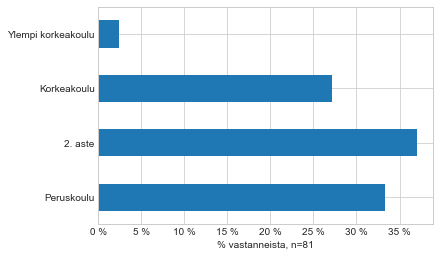

In [5]:
# Vaakapylväskaavio (Yhteensä-rivin tietoja ei oteta mukaan)
ax1 = df1.drop('Yhteensä')['%'].plot.barh()

# x-akselin otsikko
ax1.set_xlabel('% vastanneista, n=' + str(n))

# x-akselin prosenttilukujen ulkoasun viimeistely
ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])

# Kaavion tallentaminen
#plt.savefig('frekvenssi.png', bbox_inches='tight')

<h2>Seaborn-kirjaston countplot</h2>

Nopein keino lukumääräjakaumien tarkasteluun on seaborn-kirjaston countplot.

Lisätietoa ja havainnollisia esimerkkejä https://seaborn.pydata.org/generated/seaborn.countplot.html

In [6]:
import seaborn as sns

Text(0.5, 0, 'Tyytyväisyys johtoon')

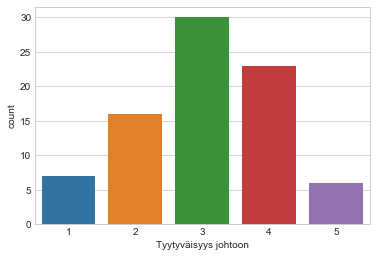

In [7]:
# Tyytyväisyys johtoon (x=... tuottaa pystypylväät)
ax2 = sns.countplot(x='johto', data=df)

ax2.set_xlabel('Tyytyväisyys johtoon')


Text(0.5, 0, 'Lukumäärä')

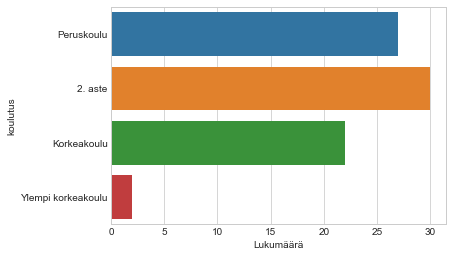

In [8]:
# Koulutus (y=... tuottaa vaakapylväät)
ax3 = sns.countplot(y='koulutus', data=df)

ax3.set_yticklabels(koulutus)
ax3.set_xlabel('Lukumäärä')